In [40]:
"""
Regression on Protein Tertiary Structure
using deep learning (Keras)
"""

import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings("ignore")

def extract_data(path):
    data_frame = pd.read_csv(path, sep=",")
    return data_frame

def create_features_target(data_frame):
    target = data_frame[["RMSD"]]
    features = data_frame.drop("RMSD", axis=1)
    return features, target

d_frame = extract_data("data/casp_regression.csv")
data_features, data_target = create_features_target(d_frame)
data_features = data_features
print("Complete data")
print(d_frame.shape)
print()
print("Features")
print(data_features.shape)
print()
print("Target")
print(data_target.shape)

# Data source: http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4321859/
# http://www.mecs-press.org/ijmsc/ijmsc-v2-n2/IJMSC-V2-N2-3.pdf

Complete data
(45730, 10)

Features
(45730, 9)

Target
(45730, 1)


In [41]:
d_frame

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


In [42]:
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

# divide the entire dataset into training and test sets
# learn on training set and evaluate the trained model on test set
test_size = 0.33
data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, 
    data_target, test_size=test_size, random_state=42)

# shapes of the datasets
print("Size of training set")
print(data_features_train.shape)
print(data_target_train.shape)
print()
print("Size of test set")
print(data_features_test.shape)
print(data_target_test.shape)

Size of training set
(30639, 9)
(30639, 1)

Size of test set
(15091, 9)
(15091, 1)


In [46]:
from PIL import Image 
neural_network  = Image.open("image/nn.png")

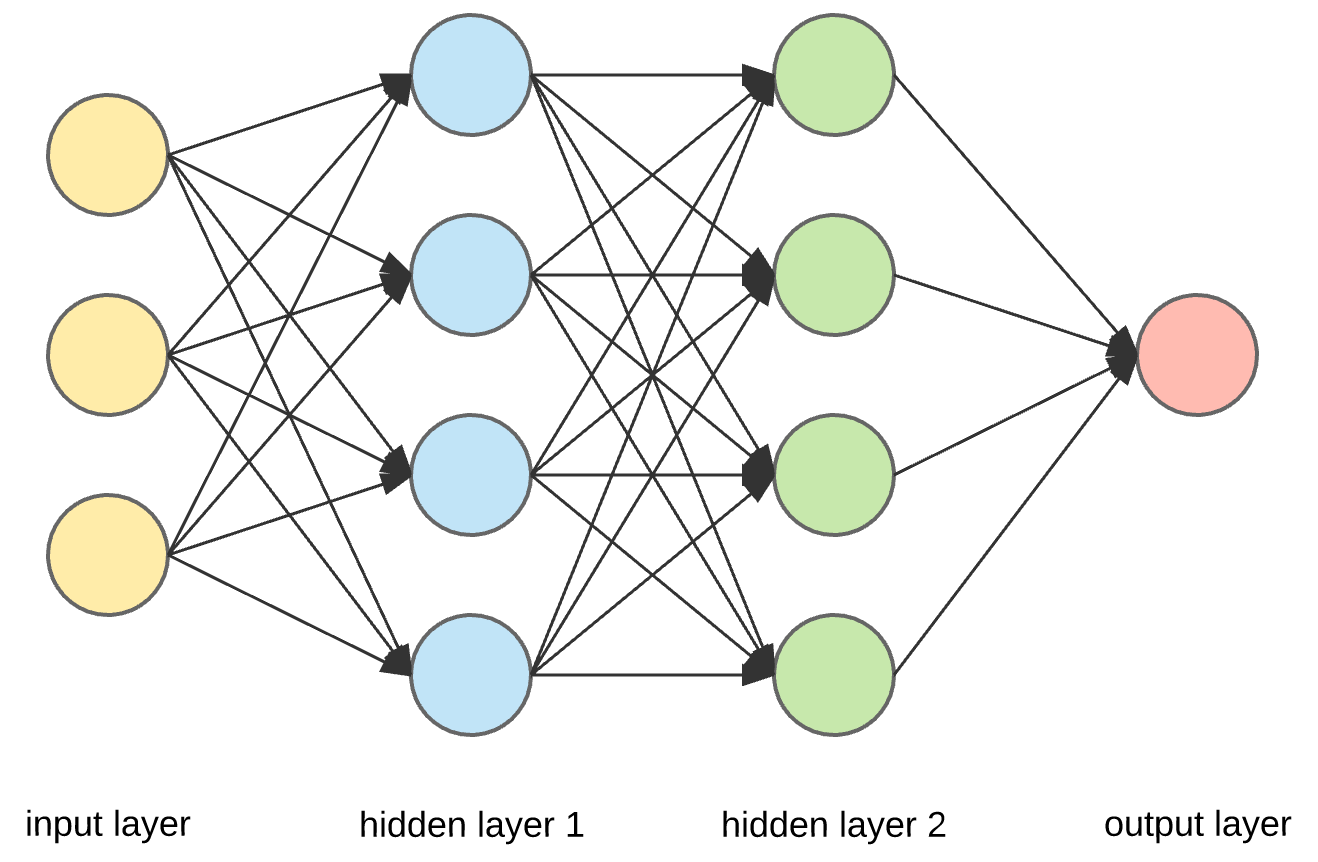

In [47]:
neural_network

In [15]:
# Define a neural network using Keras deep learning library and optimize its parameter using Hyperopt
# https://keras.io/
# https://github.com/hyperopt/hyperopt/wiki/FMin

from keras.models import Sequential, Model
from keras.layers.core import Dropout, Activation, Dense
from keras.layers import Input
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, Callback
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# set dimensions
input_dimensions = data_features_train.shape[1]

# maximum number of epochs per sample evaluation
n_epochs = 50

# type of error function
loss_type = 'mean_squared_error'

# maxinum number of sample evaluations
max_evals = 50

# set initial ranges for parameters for hyperparameter optimisation
# number of iterations within one epoch = #_training_samples / batch_size
batch_size = [30, 200] # https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

# output function for each layer
hidden_activation = ['tanh', 'relu', 'elu'] # https://keras.io/activations/
# https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02

# number of neurons for each layer
hidden_units = [60, 300] 
# https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

def create_model(params):
    
    # https://keras.io/getting-started/sequential-model-guide/
    # create network
    # input layer
    inputs = Input(shape=(input_dimensions,))
    # first hidden layer
    x = Dense(int(params["hidden_units"]), activation=params["hidden_activation"])(inputs)
    
    # dropout layer to avoid overfitting
    x = Dropout(params["dropout"])(x)
    
    # second dense layer
    x = Dense(int(params["hidden_units"]), activation=params["hidden_activation"])(x)
    
    # dropout layer to avoid overfitting
    x = Dropout(params["dropout"])(x)
    
    # output dense layer
    predictions = Dense(1, activation='linear')(x)
    
    # assign the inputs and output to the model
    model = Model(inputs=inputs, outputs=predictions)
    
    # create an optimizer object
    optimizer = RMSprop(lr=params["learning_rate"])
    
    # add optimizer and loss type to the model and compile it
    model.compile(optimizer=optimizer, loss=loss_type)
    
    print("==================================================================================")
    print("New model configuration")
    print("==================================================================================")
    model.summary()
    
    # stop training iteration as the error stops dropping
    # https://keras.io/callbacks/#callback
    # https://keras.io/callbacks/#earlystopping
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=2, min_delta=1e-4)
    
    # train the model using the training data and compute error on validation data
    model_fit = model.fit(data_features_train, data_target_train,
                          validation_data=(data_features_test, data_target_test),
                          epochs=n_epochs,
                          verbose=2,
                          batch_size=int(params["batch_size"]),
                          callbacks=[early_stopping])
    
    # predict on test data using trained model
    prediction = model.predict(data_features_test)
    mse = mean_squared_error(prediction, data_target_test)
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
    print("Mean squared error: %0.4f" % mse)
    return {'loss': mse, 'status': STATUS_OK}

# https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a
# set the search space of parameters
hyper_params = {
    "batch_size": hp.quniform("batch_size", batch_size[0], batch_size[1], 1),
    "hidden_units": hp.quniform("hidden_units", hidden_units[0], hidden_units[1], 1),
    "learning_rate": hp.loguniform("learning_rate", np.log(1e-4), np.log(1e-2)),
    "hidden_activation": hp.choice("hidden_activation", hidden_activation),
    "dropout": hp.uniform("dropout", 0.0, 0.5)
}

# store information about trial for sampling configuration
trials = Trials()

# get the best parameter configuration
best_parameters = fmin(create_model, hyper_params, trials=trials, algo=tpe.suggest, max_evals=max_evals)

best_model_params = dict()
for item in best_parameters:
    item_val = best_parameters[item]
    if item == 'hidden_activation':
        best_model_params[item] = hidden_activation[item_val]
    else:
        best_model_params[item] = item_val
print(best_model_params)

New model configuration                             
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        (None, 9)                 0         
_________________________________________________________________
dense_89 (Dense)             (None, 115)               1150      
_________________________________________________________________
dropout_17 (Dropout)         (None, 115)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 115)               13340     
_________________________________________________________________
dropout_18 (Dropout)         (None, 115)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 116       
Total params: 14,606                                
Trainable params: 14,606            

input_44 (InputLayer)        (None, 9)                 0                    
_________________________________________________________________           
dense_98 (Dense)             (None, 236)               2360                 
_________________________________________________________________           
dropout_23 (Dropout)         (None, 236)               0                    
_________________________________________________________________           
dense_99 (Dense)             (None, 236)               55932                
_________________________________________________________________           
dropout_24 (Dropout)         (None, 236)               0                    
_________________________________________________________________           
dense_100 (Dense)            (None, 1)                 237                  
Total params: 58,529                                                        
Trainable params: 58,529                                                    

Epoch 13/50                                                                 
 - 1s - loss: 525.5365 - val_loss: 59.6166                                  

Epoch 14/50                                                                 
 - 1s - loss: 180.1970 - val_loss: 57.1942                                  

Epoch 15/50                                                                 
 - 1s - loss: 143.3566 - val_loss: 54.8965                                  

Epoch 16/50                                                                 
 - 1s - loss: 173.7712 - val_loss: 52.7668                                  

Epoch 17/50                                                                 
 - 1s - loss: 123.4984 - val_loss: 50.7822                                  

Epoch 18/50                                                                 
 - 1s - loss: 538.5976 - val_loss: 49.0080                                  

Epoch 19/50                                                           

input_48 (InputLayer)        (None, 9)                 0                     
_________________________________________________________________            
dense_110 (Dense)            (None, 178)               1780                  
_________________________________________________________________            
dropout_31 (Dropout)         (None, 178)               0                     
_________________________________________________________________            
dense_111 (Dense)            (None, 178)               31862                 
_________________________________________________________________            
dropout_32 (Dropout)         (None, 178)               0                     
_________________________________________________________________            
dense_112 (Dense)            (None, 1)                 179                   
Total params: 33,821                                                         
Trainable params: 33,821                                        

 - 1s - loss: 561.9418 - val_loss: 58.4274                                   

Epoch 11/50                                                                  
 - 1s - loss: 241.7850 - val_loss: 54.5761                                   

Epoch 12/50                                                                  
 - 1s - loss: 373.3946 - val_loss: 51.2268                                   

Epoch 13/50                                                                  
 - 1s - loss: 599.8986 - val_loss: 48.3836                                   

Epoch 14/50                                                                  
 - 1s - loss: 85.8560 - val_loss: 45.6694                                    

Epoch 15/50                                                                  
 - 1s - loss: 233.7861 - val_loss: 43.4452                                   

Epoch 16/50                                                                  
 - 1s - loss: 314.6890 - val_loss: 41.7278                

Epoch 5/50                                                                    
 - 2s - loss: 11467.4588 - val_loss: 90.1566                                  

Epoch 6/50                                                                    
 - 3s - loss: 3385.9843 - val_loss: 87.1994                                   

Epoch 7/50                                                                    
 - 3s - loss: 4744.4653 - val_loss: 84.5538                                   

Epoch 8/50                                                                    
 - 3s - loss: 7019.5548 - val_loss: 81.9226                                   

Epoch 9/50                                                                    
 - 4s - loss: 4508.1992 - val_loss: 79.4584                                   

Epoch 10/50                                                                   
 - 3s - loss: 2905.8545 - val_loss: 76.7042                                   

Epoch 11/50                                   

dropout_41 (Dropout)         (None, 238)               0                      
_________________________________________________________________             
dense_126 (Dense)            (None, 238)               56882                  
_________________________________________________________________             
dropout_42 (Dropout)         (None, 238)               0                      
_________________________________________________________________             
dense_127 (Dense)            (None, 1)                 239                    
Total params: 59,501                                                          
Trainable params: 59,501                                                      
Non-trainable params: 0                                                       
_________________________________________________________________             
Train on 30639 samples, validate on 15091 samples                             
Epoch 1/50                                          

_________________________________________________________________             
dense_134 (Dense)            (None, 149)               1490                   
_________________________________________________________________             
dropout_47 (Dropout)         (None, 149)               0                      
_________________________________________________________________             
dense_135 (Dense)            (None, 149)               22350                  
_________________________________________________________________             
dropout_48 (Dropout)         (None, 149)               0                      
_________________________________________________________________             
dense_136 (Dense)            (None, 1)                 150                    
Total params: 23,990                                                          
Trainable params: 23,990                                                      
Non-trainable params: 0                             

dropout_53 (Dropout)         (None, 61)                0                      
_________________________________________________________________             
dense_144 (Dense)            (None, 61)                3782                   
_________________________________________________________________             
dropout_54 (Dropout)         (None, 61)                0                      
_________________________________________________________________             
dense_145 (Dense)            (None, 1)                 62                     
Total params: 4,454                                                           
Trainable params: 4,454                                                       
Non-trainable params: 0                                                       
_________________________________________________________________             
Train on 30639 samples, validate on 15091 samples                             
Epoch 1/50                                          

Epoch 46/50                                                                   
 - 1s - loss: 37.9531 - val_loss: 37.9885                                     

Epoch 47/50                                                                   
 - 1s - loss: 129.2878 - val_loss: 37.8587                                    

Epoch 48/50                                                                   
 - 1s - loss: 1359.6210 - val_loss: 37.7635                                   

Epoch 49/50                                                                   
 - 1s - loss: 47.7387 - val_loss: 37.6840                                     

Epoch 50/50                                                                   
 - 1s - loss: 172.1453 - val_loss: 37.6393                                    

Mean squared error: 37.6393                                                   
New model configuration                                                       
_______________________________________________

 - 2s - loss: 843.6911 - val_loss: 43.3612                                    

Epoch 36/50                                                                   
 - 2s - loss: 474.1019 - val_loss: 42.6306                                    

Epoch 37/50                                                                   
 - 2s - loss: 71.7473 - val_loss: 41.8956                                     

Epoch 38/50                                                                   
 - 2s - loss: 154.9214 - val_loss: 41.2749                                    

Epoch 39/50                                                                   
 - 2s - loss: 428.5870 - val_loss: 40.7300                                    

Epoch 40/50                                                                   
 - 2s - loss: 119.8800 - val_loss: 40.2051                                    

Epoch 41/50                                                                   
 - 2s - loss: 188.3466 - val_loss: 39.7519    

_________________________________________________________________             
Layer (type)                 Output Shape              Param #                
input_62 (InputLayer)        (None, 9)                 0                      
_________________________________________________________________             
dense_152 (Dense)            (None, 213)               2130                   
_________________________________________________________________             
dropout_59 (Dropout)         (None, 213)               0                      
_________________________________________________________________             
dense_153 (Dense)            (None, 213)               45582                  
_________________________________________________________________             
dropout_60 (Dropout)         (None, 213)               0                      
_________________________________________________________________             
dense_154 (Dense)            (None, 1)              

 - 1s - loss: 241.4487 - val_loss: 74.5218                                    

Epoch 13/50                                                                   
 - 1s - loss: 615.4360 - val_loss: 72.5500                                    

Epoch 14/50                                                                   
 - 1s - loss: 390.8691 - val_loss: 70.5954                                    

Epoch 15/50                                                                   
 - 1s - loss: 99.3737 - val_loss: 68.6589                                     

Epoch 16/50                                                                   
 - 1s - loss: 417.7468 - val_loss: 66.8328                                    

Epoch 17/50                                                                   
 - 1s - loss: 335.0641 - val_loss: 65.0625                                    

Epoch 18/50                                                                   
 - 1s - loss: 102.1196 - val_loss: 63.2909    

Epoch 2/50                                                                    
 - 1s - loss: 1508.0912 - val_loss: 86.7899                                   

Epoch 3/50                                                                    
 - 1s - loss: 95.3853 - val_loss: 75.4742                                     

Epoch 4/50                                                                    
 - 1s - loss: 731.3350 - val_loss: 66.0853                                    

Epoch 5/50                                                                    
 - 1s - loss: 375.3772 - val_loss: 58.5476                                    

Epoch 6/50                                                                    
 - 1s - loss: 107.0583 - val_loss: 51.5355                                    

Epoch 7/50                                                                    
 - 1s - loss: 70.4264 - val_loss: 46.0173                                     

Epoch 8/50                                    

 - 1s - loss: 450.5692 - val_loss: 63.5843                                    

Epoch 9/50                                                                    
 - 1s - loss: 244.3210 - val_loss: 59.7706                                    

Epoch 10/50                                                                   
 - 1s - loss: 69.2212 - val_loss: 56.1741                                     

Epoch 11/50                                                                   
 - 1s - loss: 848.2604 - val_loss: 53.1055                                    

Epoch 12/50                                                                   
 - 1s - loss: 62.9373 - val_loss: 50.1430                                     

Epoch 13/50                                                                   
 - 1s - loss: 63.2409 - val_loss: 47.4890                                     

Epoch 14/50                                                                   
 - 1s - loss: 51.6878 - val_loss: 45.1814     

Epoch 20/50                                                                   
 - 1s - loss: 315.0865 - val_loss: 66.2277                                    

Epoch 21/50                                                                   
 - 1s - loss: 66.0537 - val_loss: 64.7731                                     

Epoch 22/50                                                                   
 - 1s - loss: 93.9294 - val_loss: 63.3593                                     

Epoch 23/50                                                                   
 - 1s - loss: 109.3011 - val_loss: 61.9863                                    

Epoch 24/50                                                                   
 - 1s - loss: 61.7626 - val_loss: 60.6444                                     

Epoch 25/50                                                                   
 - 1s - loss: 123.6851 - val_loss: 59.3522                                    

Epoch 26/50                                   

Layer (type)                 Output Shape              Param #                
input_69 (InputLayer)        (None, 9)                 0                      
_________________________________________________________________             
dense_173 (Dense)            (None, 112)               1120                   
_________________________________________________________________             
dropout_73 (Dropout)         (None, 112)               0                      
_________________________________________________________________             
dense_174 (Dense)            (None, 112)               12656                  
_________________________________________________________________             
dropout_74 (Dropout)         (None, 112)               0                      
_________________________________________________________________             
dense_175 (Dense)            (None, 1)                 113                    
Total params: 13,889                                

_________________________________________________________________            
dropout_78 (Dropout)         (None, 117)               0                     
_________________________________________________________________            
dense_181 (Dense)            (None, 1)                 118                   
Total params: 15,094                                                         
Trainable params: 15,094                                                     
Non-trainable params: 0                                                      
_________________________________________________________________            
Train on 30639 samples, validate on 15091 samples                            
Epoch 1/50                                                                   
 - 3s - loss: 2433110096.2596 - val_loss: 77.2569                            

Epoch 2/50                                                                   
 - 1s - loss: 10890.3125 - val_loss: 48.7444                   

Epoch 28/50                                                                  
 - 2s - loss: 311.5072 - val_loss: 57.0324                                   

Epoch 29/50                                                                  
 - 2s - loss: 1175.9783 - val_loss: 55.7068                                  

Epoch 30/50                                                                  
 - 2s - loss: 1079.6525 - val_loss: 54.3877                                  

Epoch 31/50                                                                  
 - 2s - loss: 1834.6468 - val_loss: 53.2129                                  

Epoch 32/50                                                                  
 - 2s - loss: 241.3331 - val_loss: 51.9690                                   

Epoch 33/50                                                                  
 - 2s - loss: 270.2099 - val_loss: 50.8013                                   

Epoch 34/50                                               

_________________________________________________________________            
dropout_84 (Dropout)         (None, 62)                0                     
_________________________________________________________________            
dense_190 (Dense)            (None, 1)                 63                    
Total params: 4,589                                                          
Trainable params: 4,589                                                      
Non-trainable params: 0                                                      
_________________________________________________________________            
Train on 30639 samples, validate on 15091 samples                            
Epoch 1/50                                                                   
 - 3s - loss: 1516341339.9518 - val_loss: 87.4314                            

Epoch 2/50                                                                   
 - 1s - loss: 56317.7206 - val_loss: 37.6257                   

Epoch 9/50                                                                   
 - 2s - loss: 2717.7494 - val_loss: 60.2869                                  

Epoch 10/50                                                                  
 - 2s - loss: 1255.3145 - val_loss: 68.4194                                  

Mean squared error: 68.4194                                                  
New model configuration                                                      
_________________________________________________________________            
Layer (type)                 Output Shape              Param #               
input_77 (InputLayer)        (None, 9)                 0                     
_________________________________________________________________            
dense_197 (Dense)            (None, 154)               1540                  
_________________________________________________________________            
dropout_89 (Dropout)         (None, 154)               0      

Epoch 24/50                                                                  
 - 2s - loss: 4497.7302 - val_loss: 75.8389                                  

Epoch 25/50                                                                  
 - 2s - loss: 518.0134 - val_loss: 74.6830                                   

Epoch 26/50                                                                  
 - 2s - loss: 2772.9379 - val_loss: 73.6247                                  

Epoch 27/50                                                                  
 - 2s - loss: 710.1987 - val_loss: 72.5223                                   

Epoch 28/50                                                                  
 - 2s - loss: 530.2693 - val_loss: 71.4385                                   

Epoch 29/50                                                                  
 - 2s - loss: 614.8183 - val_loss: 70.3751                                   

Epoch 30/50                                               

_________________________________________________________________            
dense_208 (Dense)            (None, 1)                 160                   
Total params: 27,190                                                         
Trainable params: 27,190                                                     
Non-trainable params: 0                                                      
_________________________________________________________________            
Train on 30639 samples, validate on 15091 samples                            
Epoch 1/50                                                                   
 - 4s - loss: 37.8882 - val_loss: 37.7726                                    

Epoch 2/50                                                                   
 - 2s - loss: 37.5356 - val_loss: 37.5982                                    

Epoch 3/50                                                                   
 - 2s - loss: 37.5028 - val_loss: 37.5602                     

Epoch 32/50                                                                  
 - 1s - loss: 37.5497 - val_loss: 37.5725                                    

Epoch 33/50                                                                  
 - 1s - loss: 37.3801 - val_loss: 37.5637                                    

Epoch 34/50                                                                  
 - 1s - loss: 524.4508 - val_loss: 37.5617                                   

Epoch 35/50                                                                  
 - 1s - loss: 51.5684 - val_loss: 37.5603                                    

Epoch 36/50                                                                  
 - 1s - loss: 37.3717 - val_loss: 37.5600                                    

Epoch 37/50                                                                  
 - 1s - loss: 37.3733 - val_loss: 37.5599                                    

Epoch 38/50                                               

_________________________________________________________________            
Train on 30639 samples, validate on 15091 samples                            
Epoch 1/50                                                                   
 - 3s - loss: 6541066679.9481 - val_loss: 334251265.7345                     

Epoch 2/50                                                                   
 - 1s - loss: 2494785.1869 - val_loss: 93.5541                               

Epoch 3/50                                                                   
 - 1s - loss: 2013.4329 - val_loss: 82.2653                                  

Epoch 4/50                                                                   
 - 1s - loss: 80.9812 - val_loss: 70.7914                                    

Epoch 5/50                                                                   
 - 1s - loss: 1733.9935 - val_loss: 62.5276                                  

Epoch 6/50                                                 

Epoch 7/50                                                                   
 - 1s - loss: 1745.7164 - val_loss: 78.6182                                  

Epoch 8/50                                                                   
 - 1s - loss: 707.6107 - val_loss: 74.6783                                   

Epoch 9/50                                                                   
 - 1s - loss: 2058.3077 - val_loss: 71.1703                                  

Epoch 10/50                                                                  
 - 1s - loss: 936.2475 - val_loss: 67.7738                                   

Epoch 11/50                                                                  
 - 1s - loss: 446.4056 - val_loss: 64.3398                                   

Epoch 12/50                                                                  
 - 1s - loss: 331.0089 - val_loss: 61.2096                                   

Epoch 13/50                                               

_________________________________________________________________            
Layer (type)                 Output Shape              Param #               
input_87 (InputLayer)        (None, 9)                 0                     
_________________________________________________________________            
dense_227 (Dense)            (None, 65)                650                   
_________________________________________________________________            
dropout_109 (Dropout)        (None, 65)                0                     
_________________________________________________________________            
dense_228 (Dense)            (None, 65)                4290                  
_________________________________________________________________            
dropout_110 (Dropout)        (None, 65)                0                     
_________________________________________________________________            
dense_229 (Dense)            (None, 1)                 66       

Epoch 22/50                                                                  
 - 1s - loss: 100.3240 - val_loss: 39.5937                                   

Epoch 23/50                                                                  
 - 1s - loss: 6051.5141 - val_loss: 38.9980                                  

Epoch 24/50                                                                  
 - 1s - loss: 38.5740 - val_loss: 38.3612                                    

Epoch 25/50                                                                  
 - 1s - loss: 145.3912 - val_loss: 37.9765                                   

Epoch 26/50                                                                  
 - 1s - loss: 92.7827 - val_loss: 37.7287                                    

Epoch 27/50                                                                  
 - 1s - loss: 39.8457 - val_loss: 37.6111                                    

Epoch 28/50                                               

Epoch 29/50                                                                  
 - 1s - loss: 152.7337 - val_loss: 37.9891                                   

Epoch 30/50                                                                  
 - 1s - loss: 73.9636 - val_loss: 37.7806                                    

Epoch 31/50                                                                  
 - 1s - loss: 460.2359 - val_loss: 37.6777                                   

Epoch 32/50                                                                  
 - 1s - loss: 68.4301 - val_loss: 37.6119                                    

Epoch 33/50                                                                  
 - 1s - loss: 37.4079 - val_loss: 37.5787                                    

Epoch 34/50                                                                  
 - 1s - loss: 103.2713 - val_loss: 37.5668                                   

Epoch 35/50                                               

In [35]:
# Plot the optimization results

import matplotlib.pyplot as plt


f_size = 18

def plot_classification_param(key, xlabel):
    plt.figure(figsize=(10,10))
    xs = [t['misc']['vals'][key] for t in trials.trials]
    ys = [t['result']['loss'] for t in trials.trials if t['result']['loss']]
    y_val = list()
    x_val = list()
    for index, item in enumerate(ys):
        if item < 10000:
            y_val.append(item)
            x_val.append(xs[index])
    plt.scatter(x_val, y_val, s=50, linewidth=0.1, alpha=0.5, color='red')
    plt.title('Regression: Protein Tertiary Structure', fontsize=f_size)
    plt.xlabel(xlabel, fontsize=f_size)
    plt.ylabel('Mean squared error', fontsize=f_size)
    plt.grid(True)
    plt.show()

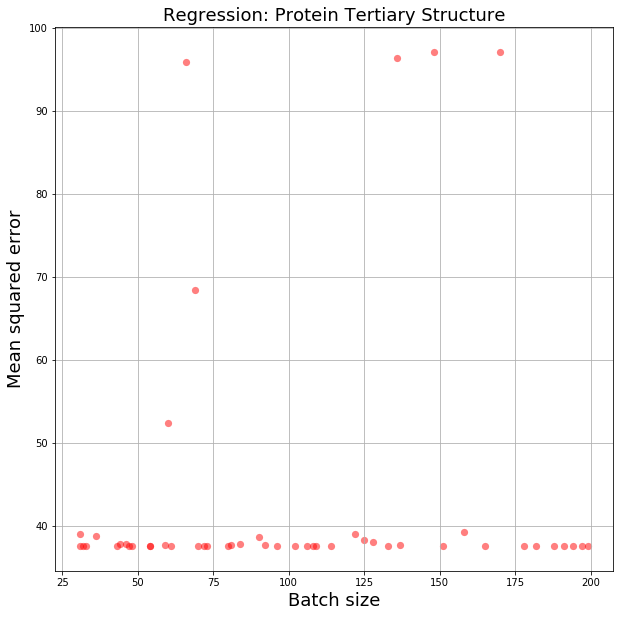

In [36]:
plot_classification_param('batch_size', 'Batch size')

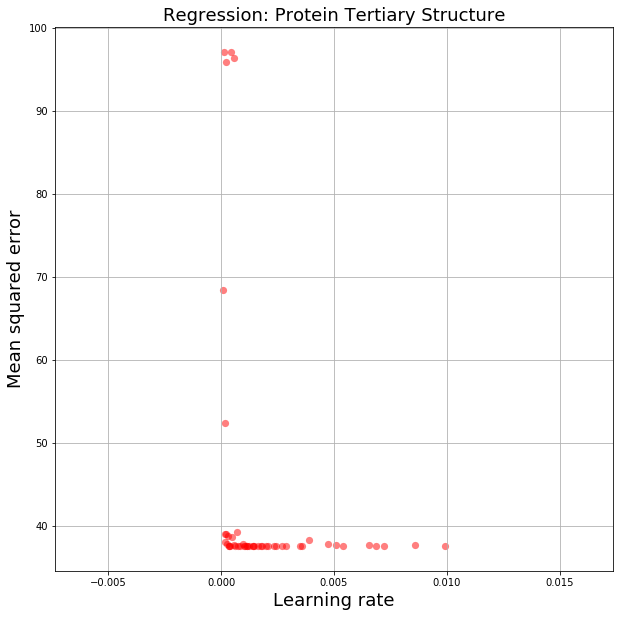

In [37]:
plot_classification_param('learning_rate', 'Learning rate')

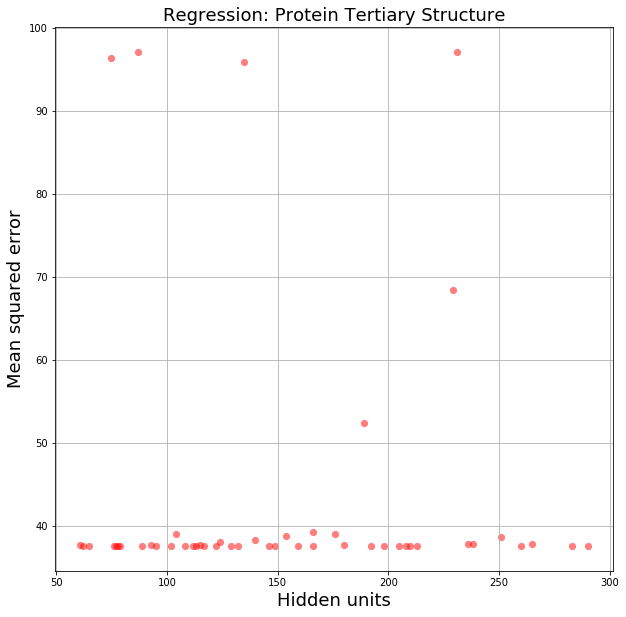

In [38]:
plot_classification_param('hidden_units', 'Number of hidden units')

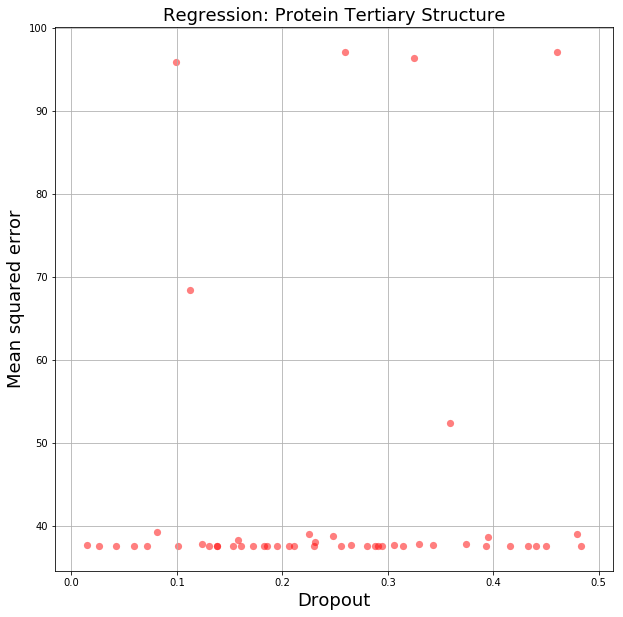

In [39]:
plot_classification_param('dropout', 'Dropout')